In [1]:
import pandas as pd
import numpy as np
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.vq as vq
from scipy.cluster.vq import kmeans, kmeans2, vq
import pylab
from collections import defaultdict
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
import statsmodels.api as sm

In [2]:
df = pd.read_csv('zcta2010.csv')
df = df.iloc[131:668]
df = df.drop(['Unnamed: 9'], axis=1)
df = df.drop(['Unnamed: 10'], axis=1)
df

,ZCTA5,LANDSQMT,WATERSQMT,LANDSQMI,WATERSQMI,POPULATION,HSGUNITS,INTPTLAT,INTPTLON
131,1001,29635470,2229770,11.44,0.86,"16,769","7,557",42.062332,-72.628274
132,1002,142556362,4280260,55.04,1.65,"29,049","10,388",42.363977,-72.458507
133,1003,1842384,12788,0.71,0.00,"10,372",5,42.389941,-72.524108
134,1005,114586903,667042,44.24,0.26,"5,079","2,044",42.418848,-72.106598
135,1007,136345999,6943853,52.64,2.68,"14,649","5,839",42.279010,-72.400468
136,1008,139331467,5086093,53.80,1.96,"1,263",586,42.191846,-72.957325
137,1009,2065002,23,0.80,0.00,741,341,42.211969,-72.341433
138,1010,89982811,1420260,34.74,0.55,"3,609","1,598",42.129477,-72.205302
139,1011,81884563,342573,31.62,0.13,"1,370",659,42.300281,-72.968716
140,1012,33977749,545075,13.12,0.21,661,343,42.375425,-72.858192


In [3]:
#Create array of values to cluster
x = []
y = []
clusters = []
for i in range(537):
    x1 = df.iloc[i]['INTPTLON']
    y1 = df.iloc[i]['INTPTLAT']
    #y1 = locale.atoi(y1)
    if x1 == 0:
        continue
    else:
        x.append(x1)          
        y.append(y1)
        clusters.append([x1, y1])

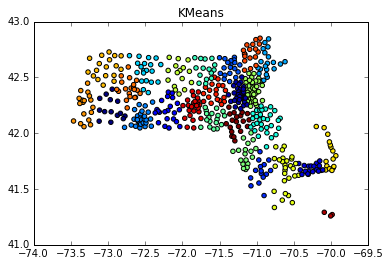

In [91]:
#some previous clusters we tried

y_pred2 = sklearn.cluster.KMeans(n_clusters = 25).fit_predict(clusters)

plt.scatter(x, y, c=y_pred2)
plt.title("KMeans")

#plt.xlim([-71,-69])

Below, is the final clustering method we chose - referred to as the alpha model from now.

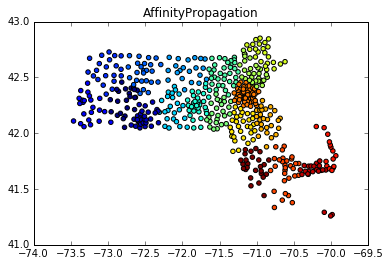

In [82]:
#This is our final clustering method: AffinityPropagation, no attributes
y_pred = sklearn.cluster.AffinityPropagation().fit_predict(clusters)
plt.scatter(x, y, c=y_pred)
plt.title("AffinityPropagation")

**Below are some of the other clustering techniques we experimented with**

We researched some attributes of Affinity Propagation in order to see if there was a more accurate representation of the differently populated areas in Boston.

To define accuracy of clustering techniques, we measured the distribtution of population densities in each cluster using standard deviation. We wanted the zip code areas in each cluster to have similar population densities, thus the lower the standard deviation of the population densities in each defined cluster, the better. Using this method we compared the average standard deviations the different techniques produced and chose those with the lower outcome.

**Damping**

Damping is commonly needed in over-relaxation methods (eg: loopy belief propagation) where it prevents the availability and responsibility updates from overshooting the solution and leading to oscillations. Higher damping factors will lead to slower convergence.

Since affinity propagation converged, the exact damping level should not have had a significant effect on the resulting net similarity. However, we decided to experiment with different levels of damping to test if this was the case.

Below, is the Affinity Propagation with a damping of 0.9

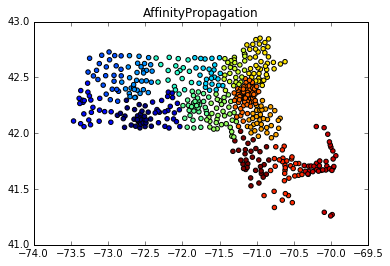

In [83]:
#Affinity Propagation - with Damping
y_pred = sklearn.cluster.AffinityPropagation(damping=0.9).fit_predict(clusters)
plt.scatter(x, y, c=y_pred)
plt.title("AffinityPropagation")

The resulting technique produced 16 clusters that performed worse. Observationally, the more densely populated areas are more defined in alpha than in the graph above. Analytically, when we compared population densities of the new clusters to alpha, the average standard deviation was 1.6 times alpha - indicating that above clusters were less accurate. Due to the unwanted influence upon the system that has the effect of restricting its oscillations, it was decided that less damping was more relevant to producing the type of clusters wanted and the lowest value (also the default value) of 0.5 was chosen.

**Convergence Iterations**
Iterations below 2, made the clustering less accurate. Those equal to 2 and above did not make a difference. As the added run time was insignificant, we decided to go with the default number of 15.


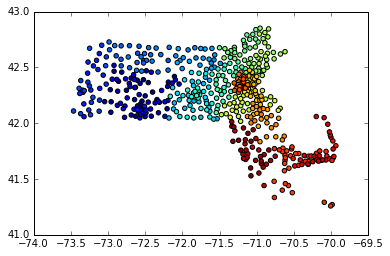

In [84]:
#Affinity Propagation - with Convergence Iterations < 2
y_pred = sklearn.cluster.AffinityPropagation(convergence_iter=1).fit_predict(clusters)
plt.scatter(x, y, c=y_pred)

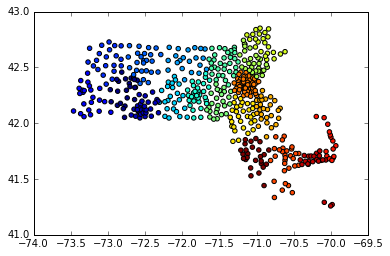

In [85]:
#Affinity Propagation - with Convergence Iterations > default (15) - No difference
y_pred = sklearn.cluster.AffinityPropagation(convergence_iter=30).fit_predict(clusters)
plt.scatter(x, y, c=y_pred)

**Max Iterations**

Iterations below 80, made the clustering less accurate. Those above 80 did not make a difference. As the added run time was insignificant, we decided to go with the default number of 200.

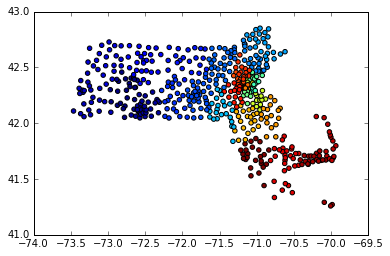

In [86]:
#Affinity Propagation - with Maximum Iterations < 80
y_pred = sklearn.cluster.AffinityPropagation(max_iter=40).fit_predict(clusters)
plt.scatter(x, y, c=y_pred)

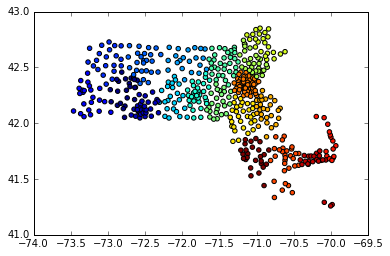

In [87]:
#Affinity Propagation - with Maximum Iterations > 80 - No difference
#Default = 200
y_pred = sklearn.cluster.AffinityPropagation(max_iter=500).fit_predict(clusters)
plt.scatter(x, y, c=y_pred)

**Preference**

Points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars - which would indicate the number of clusters - is influenced by the input preferences value. The default of this attribute is for the algorithm to choose the median of the input similarities - which has produced the best results so far (despite our efforts to map the middle of Massachusetts urban and rural areas).

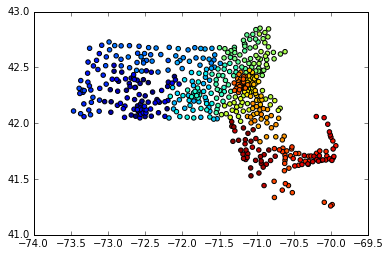

In [88]:
#Affinity Propagation - with Preference
y_pred = sklearn.cluster.AffinityPropagation(preference=[1,100,200]).fit_predict(clusters)
plt.scatter(x, y, c=y_pred)

**Affinity**
Since parameters of "Latitude" and "Longitude" are used, **Euclidean** was the best option. Also the default option.


**Verbose**
Did not make a significant difference when set to True other than let us know that it "converged after 79 iterations".

Converged after 79 iterations.


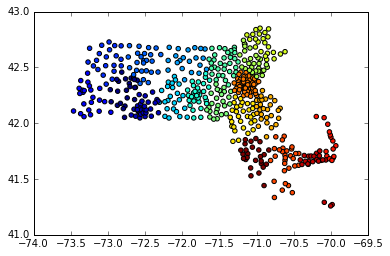

In [89]:
#Affinity Propagation - with Verbose
y_pred = sklearn.cluster.AffinityPropagation(verbose=True).fit_predict(clusters)
plt.scatter(x, y, c=y_pred)

Overall, the default options produced the best representation of clusters as filling in some attributes according to the above findings gave us the exact same graph:

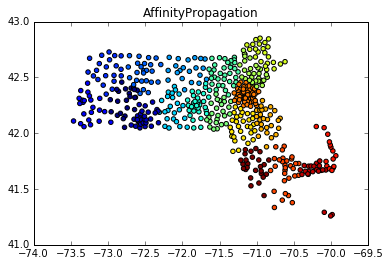

In [90]:
#Affinity Propagation - with Attributes
y_pred = sklearn.cluster.AffinityPropagation(damping=0.5, convergence_iter=2, max_iter=79, affinity='euclidean',verbose=False).fit_predict(clusters)
plt.scatter(x, y, c=y_pred)
plt.title("AffinityPropagation")